# Tarea Nº2 de Inteligencia Artificial - Ignacio Santiago Medina Díaz

En primer lugar, para esta segunda tarea de inteligencia artificial, se selecciono un dataset sobre la **Calidad de Vinos** de la plataforma *Kaggle* (*Wine Quality Dataset*), el cual contiene 1144 filas y 13 columnas (variables de entrada) basadas en pruebas fisicoquímicas.

Para cargar el dataset, se utiliza el DataFrame de Pandas ***(este es el dataset que se utilizara a lo largo de la tarea)***.

In [43]:
import pandas as pd

dataset = pd.read_csv('/WineQT.csv', sep=';')
print(dataset.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide density    pH  sulphates alcohol  \
0                 11.0                  34.0  0.9978  3.51       0.56     9.4   
1                 25.0                  67.0  0.9968  3.20       0.68     9.8   
2                 15.0                  54.0   0.997  3.26       0.65     9.8   
3                 17.0                  60.0   0.998  3.16       0.58     9.8   
4                 11.0                  34.0  0.9978  3.51       0.56     9.4   

   quality  Id  
0        5   0  
1        5

## Actividad 1 - Regresión Logística

1. Primero, asegurémonos de tener todas las librerías necesarias:
  - **pandas** para manipular y analizar los datos
  - **numpy** para realizar operaciones numéricas
  - **sklearn** (scikit-learn) que proporciona herramientas de aprendizaje automático, como:

    - **train_test_split** para dividir los datos en conjuntos de entrenamiento y prueba
    - **LogisticRegression** para entrenar el modelo de regresión logística
    - **StandardScaler** para escalar las características
    - **SimpleImputer** para imputar los valores faltantes
    - **Diversas métricas de evaluación del model**o

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

2. Vamos a explorar brevemente los datos y seleccionar las características que pueden ser más relevantes.

In [5]:
print(dataset.head())

print(dataset.info())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide density    pH  sulphates alcohol  \
0                 11.0                  34.0  0.9978  3.51       0.56     9.4   
1                 25.0                  67.0  0.9968  3.20       0.68     9.8   
2                 15.0                  54.0   0.997  3.26       0.65     9.8   
3                 17.0                  60.0   0.998  3.16       0.58     9.8   
4                 11.0                  34.0  0.9978  3.51       0.56     9.4   

   quality  Id  
0        5   0  
1        5

3. Separamos las características (X) del conjunto de datos, que serán utilizadas para entrenar el modelo, y la variable objetivo (y), que es la calidad del vino que queremos predecir.

In [6]:
print("Separando características y variable objetivo...")
X = dataset.drop(columns=['quality', 'Id'], errors='ignore')  # Ignorar 'Id' si no está presente
y = dataset['quality']
print("Separación completada.")

Separando características y variable objetivo...
Separación completada.


4. Convertimos columnas no numericas a numericas.

In [7]:
print("Convirtiendo columnas no numéricas a numéricas...")
non_numeric_cols = X.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    try:
        X[col] = pd.to_numeric(X[col].str.replace('.', '', ''), errors='coerce')
    except AttributeError:
        pass
print("Conversión completada.")

Convirtiendo columnas no numéricas a numéricas...
Conversión completada.


5. Es probable que haya valores faltantes en el conjunto de datos. Utilizamos el SimpleImputer de scikit-learn para reemplazar esos valores faltantes con la media de cada característica.

Por otro lado, las características del conjunto de datos pueden tener escalas muy diferentes. Aplicamos el escalador StandardScaler para estandarizar las características, lo que ayudará al modelo de regresión logística a converger más rápidamente.

In [8]:
print("Imputando valores faltantes y escalando los datos...")
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
print("Imputación y escalado completados.")

Imputando valores faltantes y escalando los datos...
Imputación y escalado completados.


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['density' 'alcohol']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


6. Balancear clases usando Oversampling. Esto se utiliza para equilibrar la distribución de las diferentes clases de calidad de vino, reducir el sesgo del modelo hacia las clases mayoritarias, y poder mejorar la capacidad del modelo para predecir clases minoritarias

In [29]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)


7. División en Conjunto de Entrenamiento y Prueba, Divide los datos en conjuntos de entrenamiento (80%) y de prueba (20%).



In [30]:
print("Dividiendo los datos en entrenamiento y prueba...")
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
print("División completada.")

Dividiendo los datos en entrenamiento y prueba...
División completada.


8. Creamos una instancia del modelo de regresión logística y lo entrenamos utilizando los datos de entrenamiento.


In [31]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

9. Utilizamos el modelo entrenado para hacer predicciones en el conjunto de prueba. Luego, calculamos varias métricas de evaluación, como la exactitud, precisión, sensibilidad y puntaje F1, y las imprimimos en la salida.

In [32]:
# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Métricas de evaluación:")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"Puntaje F1 (F1 Score): {f1:.4f}")

Métricas de evaluación:
Exactitud (Accuracy): 0.5828
Precisión (Precision): 0.5738
Sensibilidad (Recall): 0.5828
Puntaje F1 (F1 Score): 0.5718


10. Finalmente, imprimimos el informe de clasificación detallado y la matriz de confusión, que proporcionan información adicional sobre el desempeño del modelo.

In [33]:
# Imprimir el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

# Imprimir la matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Informe de clasificación:
              precision    recall  f1-score   support

           3       0.67      0.76      0.71        97
           4       0.51      0.61      0.56        92
           5       0.59      0.41      0.48       108
           6       0.41      0.32      0.36        95
           7       0.53      0.58      0.56        96
           8       0.72      0.85      0.78        92

    accuracy                           0.58       580
   macro avg       0.57      0.59      0.57       580
weighted avg       0.57      0.58      0.57       580


Matriz de confusión:
[[74 23  0  0  0  0]
 [14 56 11  9  1  1]
 [12 18 44 18 11  5]
 [ 5  9 15 30 26 10]
 [ 2  3  4 16 56 15]
 [ 3  0  0  0 11 78]]


### Análisis Actividad 1

Los resultados obtenidos son los siguientes:
- Exactitud (Accuracy): 0.5828
- Precisión (Precision): 0.5738
- Sensibilidad (Recall): 0.5828
- Puntaje F1 (F1 Score): 0.5718

Con respecto a los resultados obtenidos del modelo de clasificación de vinos se observo un rendimiento moderado en la tarea de predicción de calidad. El modelo alcanzó una **exactitud global** del ***58.28%***, con métricas de **precisión y sensibilidad** que se mantienen en niveles similares (***57.38% y 58.28%*** respectivamente). El **puntaje F1** de ***57.18%*** confirma la consistencia en el rendimiento general del modelo.

Lo más significativo que se observa es que el modelo destaca en la identificación de vinos de calidad **extrema**. Para los vinos de *calidad más baja* (**nivel 3**), se obtuvo una precisión del 67% y una sensibilidad del 76%. De manera similar, los vinos de *calidad más alta* (**nivel 8**) mostraron los mejores resultados, con una precisión del 72% y una sensibilidad del 85%.

Sin embargo, el modelo presenta **limitaciones** notables en la clasificación de vinos de *calidad intermedia* (**niveles 4-7**). La categoría más problemática fue la ***calidad 6***, con un F1-score de solo 0.36. La matriz de confusión indica que la mayoría de los errores ocurren entre categorías adyacentes, especialmente en las calidades intermedias.

En conclusión, el modelo es más efectivo para identificar vinos de calidad extrema (muy alta o muy baja), pero requiere mejoras significativas para discriminar entre calidades intermedias. Esta característica lo hace más adecuado para aplicaciones donde la prioridad sea identificar productos de calidad extrema, pero menos útil donde se requiera una discriminación más precisa entre categorías intermedias.



## Actividad 2 - KNN

1. Para esta segunda actividad se reutilizara los pasos de la actividad anterior, para no volver a repetir parte del código, **estos pasos son desde el 1 hasta el 6**.

2. Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

3. Implementamos KNN con 5 valores diferentes de K (3, 5, 7, 11, 15):
  - Para cada K, entrenamos un modelo
  - Hacemos predicciones
  - Calculamos las métricas de evaluación

In [36]:
k_values = [3, 5, 7, 11, 15]
results = {
    'k_value': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

4. Entrenar y evaluar el modelo para cada valor de K.

In [37]:
for k in k_values:
    print(f"\nEntrenando modelo con K={k}...")

    # Crear y entrenar el modelo KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = knn.predict(X_test)

    # Calcular métricas
    results['k_value'].append(k)
    results['accuracy'].append(accuracy_score(y_test, y_pred))
    results['precision'].append(precision_score(y_test, y_pred, average='weighted'))
    results['recall'].append(recall_score(y_test, y_pred, average='weighted'))
    results['f1'].append(f1_score(y_test, y_pred, average='weighted'))

    # Imprimir resultados detallados
    print(f"Resultados para K={k}:")
    print(f"Exactitud (Accuracy): {results['accuracy'][-1]:.4f}")
    print(f"Precisión (Precision): {results['precision'][-1]:.4f}")
    print(f"Sensibilidad (Recall): {results['recall'][-1]:.4f}")
    print(f"Puntaje F1 (F1 Score): {results['f1'][-1]:.4f}")
    print("\nInforme de clasificación detallado:")
    print(classification_report(y_test, y_pred))


Entrenando modelo con K=3...
Resultados para K=3:
Exactitud (Accuracy): 0.7862
Precisión (Precision): 0.7677
Sensibilidad (Recall): 0.7862
Puntaje F1 (F1 Score): 0.7651

Informe de clasificación detallado:
              precision    recall  f1-score   support

           3       0.91      1.00      0.95        97
           4       0.77      0.99      0.87        92
           5       0.72      0.47      0.57       108
           6       0.55      0.38      0.45        95
           7       0.76      0.95      0.85        96
           8       0.90      0.98      0.94        92

    accuracy                           0.79       580
   macro avg       0.77      0.79      0.77       580
weighted avg       0.77      0.79      0.77       580


Entrenando modelo con K=5...
Resultados para K=5:
Exactitud (Accuracy): 0.7586
Precisión (Precision): 0.7400
Sensibilidad (Recall): 0.7586
Puntaje F1 (F1 Score): 0.7316

Informe de clasificación detallado:
              precision    recall  f1-score

5. En este paso, se visualiza los resultados en una gráfica que muestra cómo cambian las métricas según el valor de K escogidos.

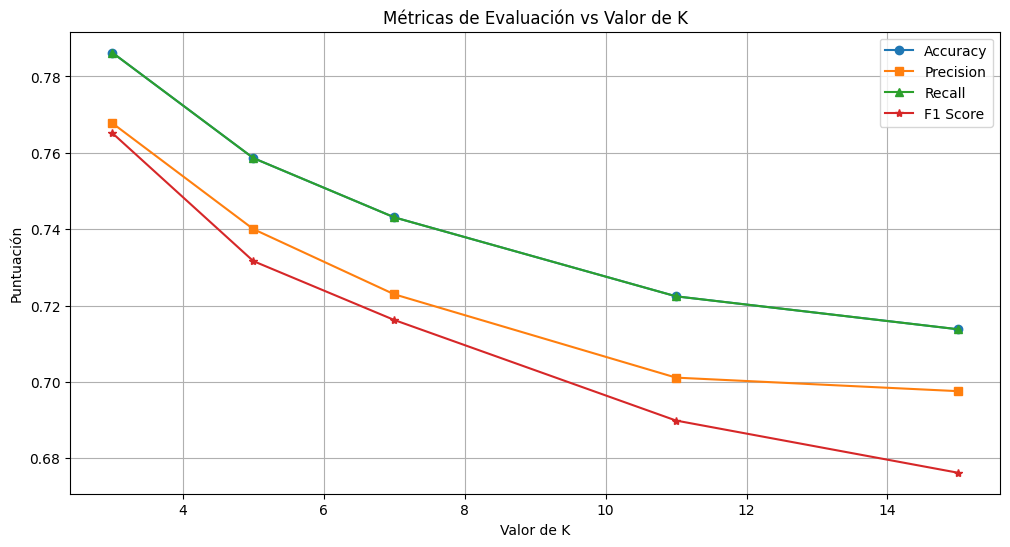

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(k_values, results['accuracy'], marker='o', label='Accuracy')
plt.plot(k_values, results['precision'], marker='s', label='Precision')
plt.plot(k_values, results['recall'], marker='^', label='Recall')
plt.plot(k_values, results['f1'], marker='*', label='F1 Score')
plt.xlabel('Valor de K')
plt.ylabel('Puntuación')
plt.title('Métricas de Evaluación vs Valor de K')
plt.legend()
plt.grid(True)
plt.show()

6. Identificar el mejor valor de K.

In [41]:
best_k_idx = np.argmax(results['f1'])
print(f"\nResumen Final:\n")
print(f"Mejor valor de K: {k_values[best_k_idx]}\n")
print(f"Métricas con el mejor K:")
print(f"Accuracy: {results['accuracy'][best_k_idx]:.4f}")
print(f"Precision: {results['precision'][best_k_idx]:.4f}")
print(f"Recall: {results['recall'][best_k_idx]:.4f}")
print(f"F1 Score: {results['f1'][best_k_idx]:.4f}")


Resumen Final:

Mejor valor de K: 3

Métricas con el mejor K:
Accuracy: 0.7862
Precision: 0.7677
Recall: 0.7862
F1 Score: 0.7651


7. Finalmente compararemos los resultados con la regresión logística anterior (Actividad 1).

In [42]:
print("\nComparación con Regresión Logística:")
print("Métricas de Regresión Logística (del ejercicio anterior):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Comparación con Regresión Logística:
Métricas de Regresión Logística (del ejercicio anterior):
Accuracy: 0.5828
Precision: 0.5738
Recall: 0.5828
F1 Score: 0.5718


### Análisis Actividad 2

A partir de los entrenamientos del modelo con las 5 distintas K (3, 5, 7, 11 y 15) y sus resultados obtenidos. Se observa una tendencia descendente en todas las metricas a medida que K aumenta (tal como se observa en la grafica generada).
  - K = 3, son los mejores resultados generales.
  - K = 15, son los peores resultados generales.

Para cada K se obtuvieron las siguientes metricas:
  - **Accuracy**
    - K=3 : 0.7862
    - K=5 : 0.7586
    - K=7 : 0.7431
    - K=11 : 0.7224
    - K=15 : 0.7138
  - **Precision**
    - K=3 : 0.7677
    - K=5 : 0.7400
    - K=7 : 0.7229
    - K=11 : 0.7011
    - K=15 : 0.6976
  - **Recall**
    - K=3 : 0.7862
    - K=5 : 0.7586
    - K=7 : 0.7431
    - K=11 : 0.7224
    - K=15 : 0.7138
  - **F1-Score**
    - K=3 : 0.7651
    - K=5 : 0.7316
    - K=7 : 0.7162
    - K=11 : 0.6899
    - K=15 : 0.6762
  
En conclusion de lo anterior, se puede decir que el mejor K es el 3 con el mejor desempeño, con las siguientes metricas:
  - Accuracy: 0.7862
  - Precision: 0.7677
  - Recall: 0.7862
  - F1 Score: 0.7651



---



Con respecto al modelo de Regresión Logística, se puede apreciar la siguiente comparación:
  - **Accuracy**
    - KNN (K=3) : 0.7862
    - R.Logística : 0.5828
  - **Precision**
    - KNN (K=3) : 0.7677
    - R.Logística : 0.5738
  - **Recall**
    - KNN (K=3) : 0.7862
    - R.Logística : 0.5828
  - **F1-Score**
    - KNN (K=3) : 0.7651
    - R.Logística : 0.5718

Con respecto a lo anterior se puede analisar lo siguente.

Para la metrica ***Accuracy (Exactitud)***, KNN supera significativamente a la Regresión Logística (R.L.) con una mejora del **34.9%**, esto indica que KNN clasifica correctamente una mayor proporción de muestras en general. Por otra parte, la diferencia de **0.2034** (0.7862 - 0.5828) es sustancial en términos de clasificación.

Para la segunda metrica de ***Precision***, para KNN indica que es más confiable cuando predice una clase específica, y mejora un 33.8% en la capacidad de evitar falsos positivos.

Para la tercera metrica utilizada llamada ***Recall o Sensibilidad*** demuestra ser mejor para encontrar todos los casos relevantes con una mejora del 34.9% para poder identificar las muestras positivas.

Finalmente, para F1-Score, de igual manera que las anteriores, supera KMM a R.L. mejorando un 33.8% en el balance entre precision y recall, con un mejor rendimiento general del modelo.



---




En conclusión, KNN supera consistentemente a la Regresión Logística en todas las metricas sobre el conjunto especifico de datos WineQuality, esto se debe a que posee una naturaleza no lineal sobre sus datos, explicando el mejor rendimiento de KNN.
Por otra parte, K con valor 3 proporciona el mejor balance entre todas las metricas, ya que con valores K mas altos tiende a suavizar demasiado las fronteras de decisión.

## Actividad 3 - DBSCAN y GMM

1. Igual que en la actividad anterior se reciblara codigo, pero con unas pequeñas diferencias.

In [58]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

2. Escalamos los datos usando dos métodos diferentes (StandardScaler y MinMaxScaler) y luego aplicamos PCA para reducir dimensionalidad y visualización para poder mejorar el clustering.

In [62]:
# Escalado de datos
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

X_standard = standard_scaler.fit_transform(X)
X_minmax = minmax_scaler.fit_transform(X)

# Reducción de dimensionalidad para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standard)

# Visualizar la varianza explicada por PCA
print("Varianza explicada por los componentes principales:")
print(pca.explained_variance_ratio_)

Varianza explicada por los componentes principales:
[0.25720019 0.16561227]


3. Se procede a configurar el modelo DBSCAN preparando diferentes conjuntos de datos escalados.

In [63]:
dbscan_configs = [
    {'eps': 1.0, 'min_samples': 5},
    {'eps': 1.5, 'min_samples': 5},
    {'eps': 2.0, 'min_samples': 5},
    {'eps': 1.0, 'min_samples': 10},
    {'eps': 1.5, 'min_samples': 10},
    {'eps': 2.0, 'min_samples': 10}
]

datasets = {
    'Standard Scaled': X_standard,
    'MinMax Scaled': X_minmax,
    'PCA': X_pca
}

4. Se evalua DBSCAN probamos cada configuración con diferentes escalados y calculando métricas (Silhouette, ARI, AMI) procediendo guardando los mejores resultados.

In [64]:
best_results = {
    'scaling': None,
    'config': None,
    'silhouette': -1,
    'labels': None
}

print("Resultados de DBSCAN con diferentes escalados:")
print("-" * 70)

for data_name, X_scaled in datasets.items():
    print(f"\nProbando con {data_name}:")

    for config in dbscan_configs:
        dbscan = DBSCAN(eps=config['eps'], min_samples=config['min_samples'])
        labels = dbscan.fit_predict(X_scaled)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        if n_clusters > 1:
            try:
                sil_score = silhouette_score(X_scaled, labels)
                ari_score = adjusted_rand_score(y, labels)
                ami_score = adjusted_mutual_info_score(y, labels)

                print(f"\nConfiguración: eps={config['eps']}, min_samples={config['min_samples']}")
                print(f"Número de clusters: {n_clusters}")
                print(f"Puntos de ruido: {n_noise} ({n_noise/len(labels)*100:.2f}%)")
                print(f"Silhouette Score: {sil_score:.4f}")
                print(f"ARI: {ari_score:.4f}")
                print(f"AMI: {ami_score:.4f}")

                if sil_score > best_results['silhouette']:
                    best_results['scaling'] = data_name
                    best_results['config'] = config
                    best_results['silhouette'] = sil_score
                    best_results['labels'] = labels
            except:
                continue

Resultados de DBSCAN con diferentes escalados:
----------------------------------------------------------------------

Probando con Standard Scaled:

Configuración: eps=1.0, min_samples=5
Número de clusters: 8
Puntos de ruido: 570 (49.87%)
Silhouette Score: -0.2438
ARI: -0.0055
AMI: 0.0142

Configuración: eps=2.0, min_samples=5
Número de clusters: 3
Puntos de ruido: 76 (6.65%)
Silhouette Score: 0.1814
ARI: 0.0025
AMI: 0.0078

Configuración: eps=1.0, min_samples=10
Número de clusters: 3
Puntos de ruido: 729 (63.78%)
Silhouette Score: -0.1359
ARI: -0.0119
AMI: 0.0013

Probando con MinMax Scaled:

Probando con PCA:


5. Evaluación de GMM probando diferentes numeros de componentes y calculando metricas. Incluimos el criterio BIC.

In [65]:
# GMM con diferentes números de componentes
n_components_range = range(2, 11)
gmm_results = []

print("\nResultados de GMM con diferente número de componentes:")
print("-" * 70)

for n_comp in n_components_range:
    gmm = GaussianMixture(n_components=n_comp, random_state=42, n_init=5)
    labels_gmm = gmm.fit_predict(X_standard)

    sil_score = silhouette_score(X_standard, labels_gmm)
    ari_score = adjusted_rand_score(y, labels_gmm)
    ami_score = adjusted_mutual_info_score(y, labels_gmm)
    bic_score = gmm.bic(X_standard)

    gmm_results.append({
        'n_components': n_comp,
        'silhouette': sil_score,
        'ari': ari_score,
        'ami': ami_score,
        'bic': bic_score
    })

    print(f"\nNúmero de componentes: {n_comp}")
    print(f"Silhouette Score: {sil_score:.4f}")
    print(f"ARI: {ari_score:.4f}")
    print(f"AMI: {ami_score:.4f}")
    print(f"BIC: {bic_score:.2f}")


Resultados de GMM con diferente número de componentes:
----------------------------------------------------------------------

Número de componentes: 2
Silhouette Score: 0.3501
ARI: 0.0051
AMI: 0.0009
BIC: 14911.71

Número de componentes: 3
Silhouette Score: 0.4240
ARI: -0.0044
AMI: 0.0006
BIC: 8728.65

Número de componentes: 4
Silhouette Score: 0.1312
ARI: 0.0113
AMI: 0.0089
BIC: 6269.87

Número de componentes: 5
Silhouette Score: 0.1171
ARI: 0.0135
AMI: 0.0155
BIC: 6152.99

Número de componentes: 6
Silhouette Score: 0.1121
ARI: 0.0108
AMI: 0.0166
BIC: 5646.83

Número de componentes: 7
Silhouette Score: 0.0263
ARI: 0.0695
AMI: 0.0833
BIC: 5074.27

Número de componentes: 8
Silhouette Score: 0.0602
ARI: 0.0588
AMI: 0.0710
BIC: 6079.27

Número de componentes: 9
Silhouette Score: 0.0666
ARI: 0.0639
AMI: 0.0847
BIC: 5565.61

Número de componentes: 10
Silhouette Score: 0.0672
ARI: 0.0650
AMI: 0.0883
BIC: 5739.88


6. A continuación se visualizaran los resultados de los clusters de DBSCAN y GMM, mostrando cuatro greficos diferentes.

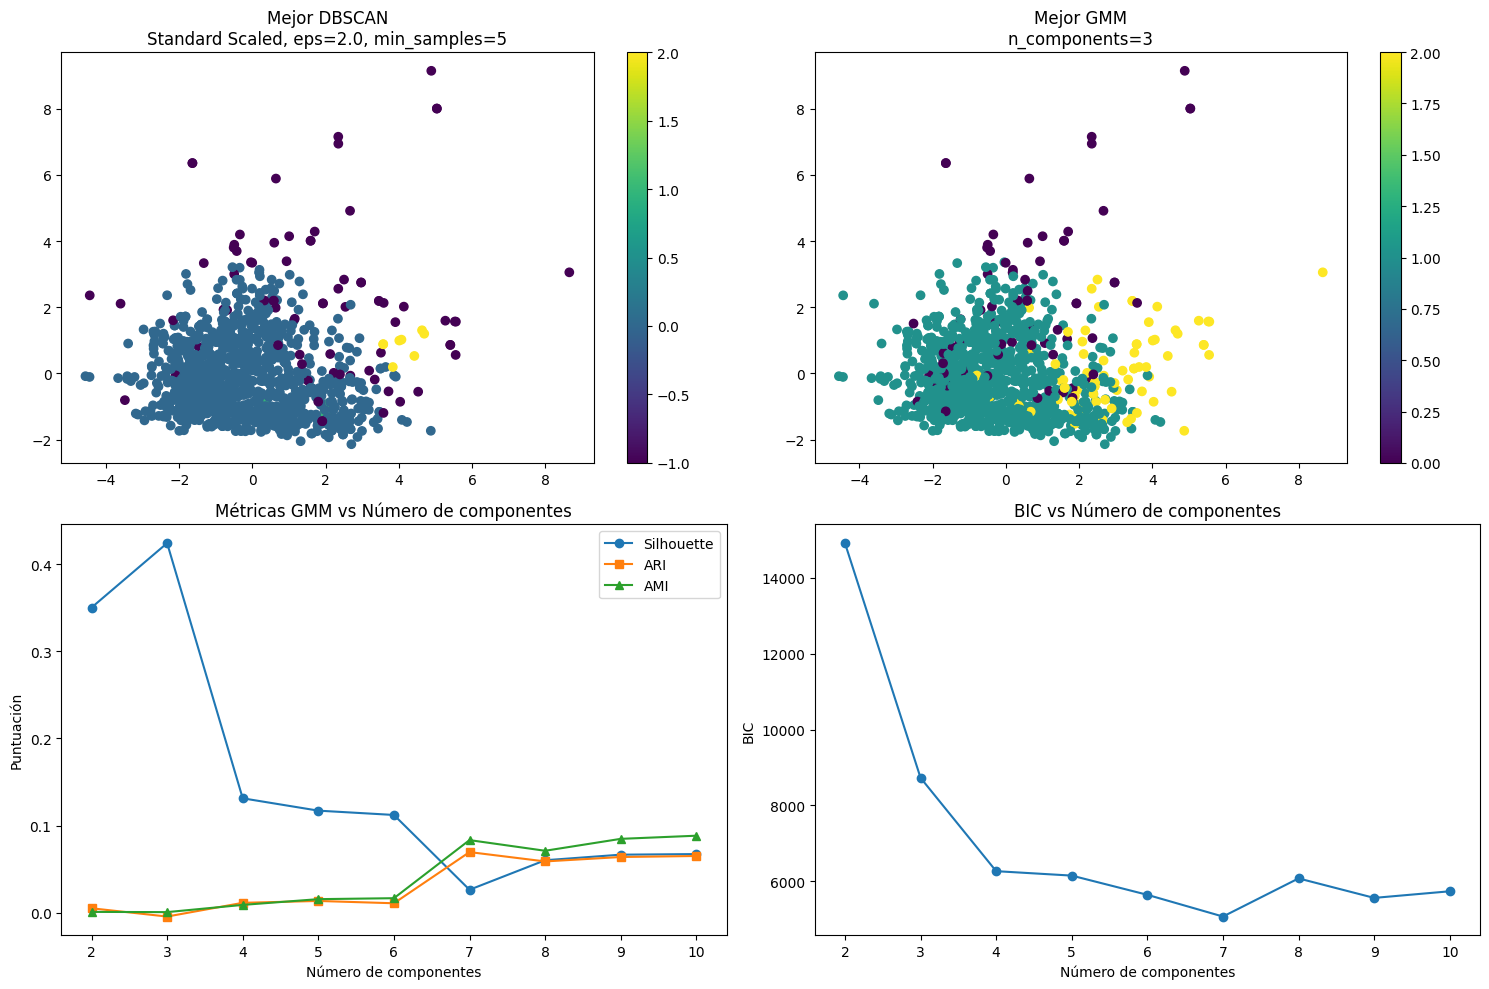

In [66]:
plt.figure(figsize=(15, 10))

# Visualizar clusters mejor DBSCAN
plt.subplot(2, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_results['labels'], cmap='viridis')
plt.title(f'Mejor DBSCAN\n{best_results["scaling"]}, eps={best_results["config"]["eps"]}, min_samples={best_results["config"]["min_samples"]}')
plt.colorbar(scatter)

# Visualizar mejor GMM
best_gmm_idx = np.argmax([r['silhouette'] for r in gmm_results])
best_gmm = GaussianMixture(n_components=gmm_results[best_gmm_idx]['n_components'], random_state=42)
labels_best_gmm = best_gmm.fit_predict(X_standard)

plt.subplot(2, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_best_gmm, cmap='viridis')
plt.title(f'Mejor GMM\nn_components={gmm_results[best_gmm_idx]["n_components"]}')
plt.colorbar(scatter)

# Gráfico de métricas GMM
plt.subplot(2, 2, 3)
metrics_df = pd.DataFrame(gmm_results)
plt.plot(metrics_df['n_components'], metrics_df['silhouette'], 'o-', label='Silhouette')
plt.plot(metrics_df['n_components'], metrics_df['ari'], 's-', label='ARI')
plt.plot(metrics_df['n_components'], metrics_df['ami'], '^-', label='AMI')
plt.xlabel('Número de componentes')
plt.ylabel('Puntuación')
plt.title('Métricas GMM vs Número de componentes')
plt.legend()

# Gráfico BIC
plt.subplot(2, 2, 4)
plt.plot(metrics_df['n_components'], metrics_df['bic'], 'o-')
plt.xlabel('Número de componentes')
plt.ylabel('BIC')
plt.title('BIC vs Número de componentes')

plt.tight_layout()
plt.show()

### Análisis Actividad 3

**El algoritmo de DBSCAM se obtuvo las siguientes configuraciones:**
1. Configuración: eps=1.0, min_samples=5;
Número de clusters: 8;
Puntos de ruido: 570 (49.87%);
Silhouette Score: -0.2438;
ARI: -0.0055;
AMI: 0.0142.

2. Configuración: eps=2.0, min_samples=5;
Número de clusters: 3;
Puntos de ruido: 76 (6.65%);
Silhouette Score: 0.1814;
ARI: 0.0025;
AMI: 0.0078.

3. Configuración: eps=1.0, min_samples=10;
Número de clusters: 3;
Puntos de ruido: 729 (63.78%);
Silhouette Score: -0.1359;
ARI: -0.0119;
AMI: 0.0013.

Se puede observar que el mejor fue de Silhouette Score con un 0.1814 con la siguiente configuración, siendo la mejor:
  - Configuración: eps=2.0, min_samples=5
  - Silhouette Score: 0.1814.

Cabe destacar que el valor relativamente bajo sugiere que los clusters no estan bien definidos o separados.



---


**Por parte de GMM (Gaussian Mixture Model):**
  - Mejor Silhouette Score: 0.4240
  - Número óptimo de componentes: 3
  - Métricas de comparación con etiquetas reales:
    - ARI: -0.0044 (muy bajo)
    - AMI: 0.0006 (muy bajo)

***El Silhouette Score más alto indica que GMM formó clusters más coherentes que DBSCAN.***


---




Las ventajas de DBSCAN es que no requiere especificar el número de clusters a priori y puede detectar clusters de formas arbitrarias. Por otra parte, sus desventajas es que el rendimiento es limitado (Silhouette Score bajo), sensible a la elección de parámetros eps y min_samples y no funcionó bien con la estructura de los datos.



---

Las ventajas y desventajas de GMM. Partiendo con la primera, posee mejor rendimiento general (Silhouette Score más alto), buena adaptación a la estructura natural de los datos siendo clusters más coherentes. Y las desventajas, posee baja correspondencia con las etiquetas reales (ARI y AMI bajos) y un grave problema es que asume clusters con forma gaussiana.


---



En conclusión, GMM demostró ser más efectivo que DBSCAN para este conjunto de datos específico, presentando mejor separación de clusters (Silhouette Score más alto) y mayor capacidad para capturar la estructura subyacente de los datos.

La baja correlación con las etiquetas originales sugiere que la estructura natural de los datos no coincide con la clasificación predefinida, por lo que podría haber patrones o agrupaciones no evidentes en las etiquetas originales

Cabe mencionar que para tareas de agrupamiento no supervisado, GMM sería la mejor opción, ya que, para este caso siendo clasificación supervisada, podrían necesitarse enfoques adicionales.


---



### Comparación con las Actividades Anteriores

Con respecto a los ***algoritmos de clasificación supervisada*** los cuales son Regresión Logística y KNN, se obtiene lo siguiente:
1. La **Regresión Logística** mostró los siguientes resultados:
  - Exactitud (Accuracy): 58.28%
  - Precisión (Precision): 57.38%
  - Sensibilidad (Recall): 58.28%
  - Puntuación F1 (F1 Score): 57.18%

2. El algoritmo **KNN**, con un valor óptimo de K=3, alcanzó:
  - Exactitud (Accuracy): 78.62%
  - Precisión (Precision): 76.77%
  - Sensibilidad (Recall): 78.62%
  - Puntuación F1 (F1 Score): 76.51%

Por otro lado, los ***algoritmos de clasificación no supervisado*** (DBSCAN y GMM) se obtiene lo siguiente:

3. **DBSCAN**, en su mejor configuración, presentó:
  - Escalado: Standard Scaled
  - Epsilon: 2.0
  - Muestras mínimas: 5
  - Puntuación Silhouette: 18.14%

4. **GMM**, con su configuración óptima, obtuvo:
  - Componentes: 3
  - Puntuación Silhouette: 42.40%
  - Índice ARI: -0.0044
  - Índice AMI: 0.0006

Con respecto a los algoritmos supervisados, se puede observar que el algoritmo KNN demostró un rendimiento significativamente superior a la Regresión Logística, con una mejora promedio de 20 puntos porcentuales en todas las métricas evaluadas. Esta diferencia sugiere que los datos presentan patrones no lineales que KNN logra capturar de manera más efectiva. El valor óptimo de K=3 indica que las clases están bien definidas en entornos locales pequeños.

En segundo lugar, los algoritmos no supervisados, GMM superó a DBSCAN con una diferencia notable en la puntuación Silhouette (42.40% versus 18.14%). Es particularmente relevante que GMM identificó naturalmente tres clusters, coincidiendo con el número óptimo de vecinos en KNN. Sin embargo, los bajos valores de ARI y AMI sugieren que la estructura natural de los datos difiere de las etiquetas predefinidas.

En conclusion de lo anterior, se concluye que el rendimiento es superior en los algoritmos supervisados (*especialmente KNN)* sobre los no supervisados indicando que las etiquetas proporcionan información valiosa para la clasificación. No obstante, **GMM logró identificar una estructura inherente** en los datos que coincide *parcialmente* con la clasificación supervisada, específicamente en la identificación de tres grupos principales.